In [ ]:
!pip install bing-image-downloader

from bing_image_downloader import downloader

emociones = ['felicidad', 'tristeza', 'enojo', 'sorpresa']

for emocion in emociones:
    downloader.download(emocion + ' cara', limit=50, output_dir='dataset_emociones',
                        adult_filter_off=True, force_replace=False, timeout=60)


[%] Downloading Images to /content/dataset_emociones/felicidad cara


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://as2.ftcdn.net/v2/jpg/04/13/89/41/1000_F_413894163_7dpMpgPyhEK2s7ZzjymitxlYoXX71Oyz.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://as2.ftcdn.net/v2/jpg/04/13/89/41/1000_F_413894161_lR5hMKbGZeIwAuDscsdj9zCx1c9TFUFq.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://tresubresdobles.com/wp-content/uploads/2021/07/E5TdruFWYAgFX9H.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://tresubresdobles.com/wp-content/uploads/2021/07/109c35ebe87dc4fa3f1550642b8af548_1296x1361.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://insiders.life/wp-content/uploads/2023/04/cara_feliz_.jpeg
[!] Issue getting: https://insiders.life/wp-content/uploads/2023/04/cara_feliz_.jpeg
[!] Error:: Remote end closed connection without response
[%] Downloading Image #5 from https://insiders.life/wp

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

dataset_dir = '/content/dataset_emociones'
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42)

class_names = list(train_data.class_indices.keys())
print("Clases detectadas:", class_names)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=50,
                    callbacks=[early_stop])

model.save('modelo_emociones.h5')
print("✅ Modelo guardado como modelo_emociones.h5")


Found 160 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Clases detectadas: ['enojo cara', 'felicidad cara', 'sorpresa cara', 'tristeza cara']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.3485 - loss: 1.5345 - val_accuracy: 0.2632 - val_loss: 2.1720
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7658 - loss: 0.6181 - val_accuracy: 0.2368 - val_loss: 2.7885
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8742 - loss: 0.3697 - val_accuracy: 0.2895 - val_loss: 2.9379
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9664 - loss: 0.1538 - val_accuracy: 0.2895 - val_loss: 5.5197
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9695 - loss: 0.1003 - val_accuracy: 0.2895 - val_loss: 6.9357
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9664 - loss: 0.1905 - val_accuracy: 0.2895 - val_loss: 10.0249


✅ Modelo guardado como modelo_emociones.h5


Saving 3ae1d967-8e45-4e98-bc0a-e74cc08d9af2.jpg to 3ae1d967-8e45-4e98-bc0a-e74cc08d9af2.jpg


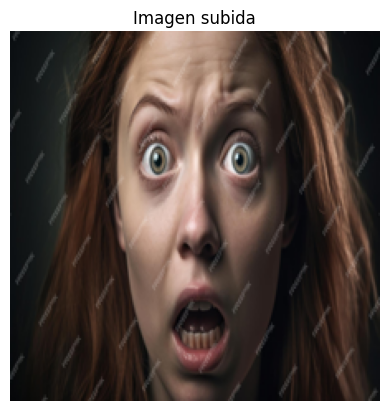

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 Emoción detectada: ENOJO


In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar modelo entrenado
model = load_model('modelo_emociones.h5')

# Usa las clases detectadas previamente
class_names = ['felicidad', 'tristeza', 'enojo', 'sorpresa']  # Asegúrate que coincidan con lo impreso antes

# Subir imagen desde tu equipo
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Preprocesar imagen
img = Image.open(image_path).convert('RGB').resize((224, 224))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen subida")
plt.show()

img_array = np.array(img).astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predicción
prediction = model.predict(img_array)
predicted_label = class_names[np.argmax(prediction)]

# Resultado
print(f"🔍 Emoción detectada: {predicted_label.upper()}")
